In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import gamma
import scipy.integrate
import pandas
# TO DO: Update to most recent Planck results
from astropy.cosmology import Planck18_arXiv_v2 as cosmo
from funcs import mean_median, mm_sample, survey, nearest_wavelength, mass_sample, mass_john, mass_jv
from importlib import reload  
from tqdm import tqdm
filesave=1
import warnings
warnings.filterwarnings('ignore')
import pickle
runall=0

# Get all the data in

In [5]:
# Path to tables of cosmic variance values
path = "../../CV_Vals/"
file='extrapolate'
save=1
# Get young, blue galaxy spectrum
data = np.loadtxt("../erb2010_continuum.dat")
x = data[:,0]
y = data[:,1] * x**2 / 3.e18 # Convert to correct flux values

# Constants
tot_sky = 41253. # Total degrees on the sky
masses = np.arange(8,12,0.25) # Mass bins in log(M/Msun)
area_dict={'COSMOS':1.27/tot_sky}
# TO DO: Modify cosmic variance values from the tables such that masses <= 8 use the same cosmic variance values as 8.5
# Currently the CV values are incorrectly extrapolated to lower masses from a mass of 8.5
# The code used to calculated the CV values is called "getcv" and is included with the CV value files
#Done

# trials = 10000 # Number of trials for calculating median from gamma function
mmin = 9 # Minimum halo mass for HMF
mmax = 14.5 # Maximum halo mass for HMF

In [6]:
df = pandas.read_csv(path+'cv_john.csv')
df.drop('11.5', axis=1, inplace=True)
df.drop('12.0', axis=1, inplace=True)
z_vals = df["z"].values
z_vals = z_vals[::-1]
z_vals

array([7.  , 6.  , 5.  , 4.  , 3.25, 2.75, 2.25, 1.75, 1.3 , 0.95, 0.65,
       0.35])

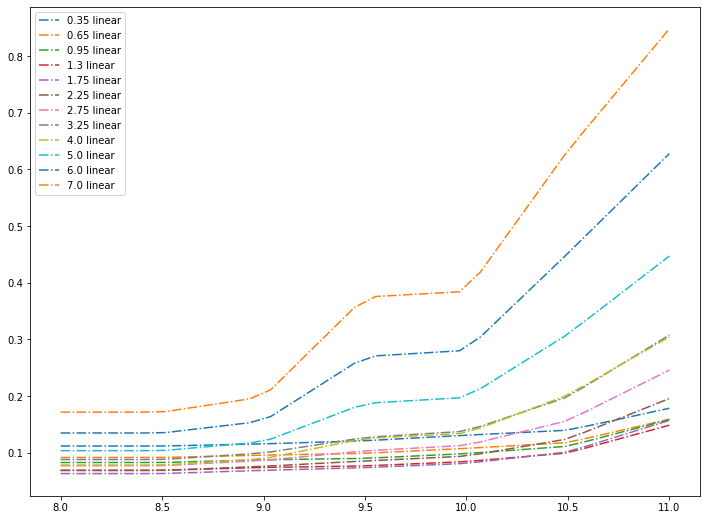

In [7]:
from scipy.interpolate import interp1d
res=0.05
m2=np.arange(8,11.5,0.5)
mf=np.linspace(8,11,3*10)
N=1
fig, ax = plt.subplots(figsize=(12,9))
for z in z_vals[::-1]:
    sig1 = np.array(df.loc[df['z'] == z])[0][5:]
    f = interp1d(m2, sig1)
    f2 = interp1d(m2, sig1, kind='cubic')
#     ax.plot(m2,sig1, '-', label=str(z))
    ax.plot(mf,f(mf), '-.', label=str(z)+' linear')
#should probably try a spline as well    
ax.legend()

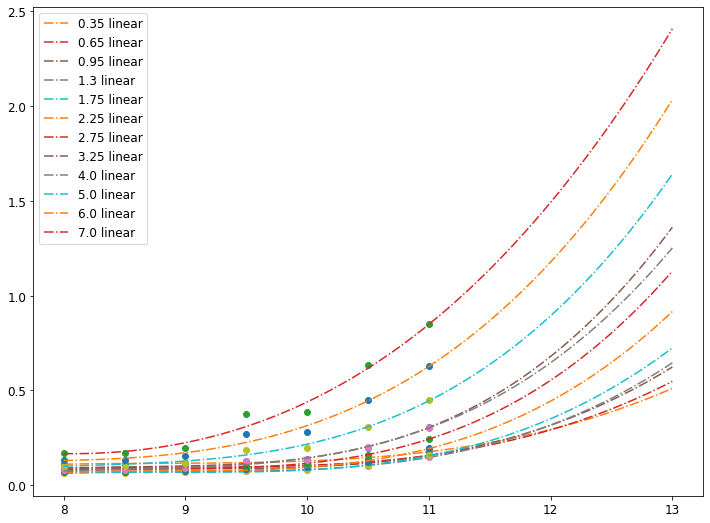

In [38]:
# from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline as spli
res=0.05
m2=np.arange(8,11.5,0.5)
mf=np.linspace(8,11+2,101)
fig, ax = plt.subplots(figsize=(12,9))
sigm=[]
for z in z_vals[::-1]:
    sig1 = np.array(df.loc[df['z'] == z])[0][5:]
    f = spli(m2, sig1)
#     f2 = interp1d(m2, sig1, kind='cubic')
    ax.plot(m2,sig1, 'o')
    ax.plot(mf,f(mf), '-.', label=str(z)+' linear')
    sigm.append(f(mf))
#should probably try a spline as well    
# ax.set(yscale='log')
ax.legend()

In [51]:
m=pd.DataFrame(sigm[::-1], columns=mf, index=z_vals)
# gamma=gamma.drop(11.25, axis=1)
m.to_csv('conservative_8to13_005_19102021.csv')
m

,8.00,8.05,8.10,8.15,8.20,8.25,8.30,8.35,8.40,8.45,...,12.55,12.60,12.65,12.70,12.75,12.80,12.85,12.90,12.95,13.00
7.00,0.166629,0.166370,0.166413,0.166762,0.167423,0.168399,0.169697,0.171320,0.173273,0.175562,...,1.959593,2.006376,2.053895,2.102157,2.151164,2.200924,2.251439,2.302715,2.354757,2.407569
6.00,0.130248,0.130944,0.131733,0.132623,0.133621,0.134738,0.135981,0.137359,0.138881,0.140554,...,1.606253,1.650225,1.695064,1.740779,1.787378,1.834871,1.883264,1.932567,1.982789,2.033938
5.00,0.099724,0.100903,0.102046,0.103162,0.104262,0.105355,0.106451,0.107561,0.108693,0.109858,...,1.262452,1.300922,1.340258,1.380469,1.421567,1.463560,1.506459,1.550273,1.595013,1.640688
4.00,0.075121,0.076428,0.077635,0.078750,0.079783,0.080745,0.081644,0.082490,0.083293,0.084062,...,0.942016,0.973270,1.005292,1.038092,1.071680,1.106065,1.141256,1.177263,1.214096,1.251764
3.25,0.084567,0.086266,0.087805,0.089196,0.090449,0.091578,0.092594,0.093507,0.094331,0.095077,...,1.010241,1.045469,1.081607,1.118665,1.156656,1.195591,1.235481,1.276340,1.318178,1.361007
2.75,0.074221,0.075774,0.077168,0.078415,0.079523,0.080504,0.081369,0.082127,0.082789,0.083365,...,0.831979,0.861766,0.892342,0.923717,0.955903,0.988910,1.022748,1.057427,1.092959,1.129352
2.25,0.066257,0.067612,0.068822,0.069894,0.070838,0.071664,0.072378,0.072992,0.073512,0.073950,...,0.671499,0.695959,0.721081,0.746874,0.773348,0.800511,0.828373,0.856941,0.886225,0.916233
1.75,0.061367,0.062484,0.063478,0.064354,0.065120,0.065783,0.066351,0.066830,0.067228,0.067552,...,0.530172,0.549517,0.569395,0.589811,0.610775,0.632292,0.654371,0.677018,0.700240,0.724045
1.30,0.067381,0.068389,0.069284,0.070071,0.070758,0.071350,0.071854,0.072276,0.072624,0.072903,...,0.475049,0.492055,0.509532,0.527487,0.545926,0.564857,0.584285,0.604217,0.624660,0.645619
0.95,0.081152,0.082099,0.082941,0.083683,0.084331,0.084892,0.085371,0.085775,0.086109,0.086380,...,0.464023,0.479935,0.496288,0.513087,0.530338,0.548048,0.566223,0.584868,0.603989,0.623593


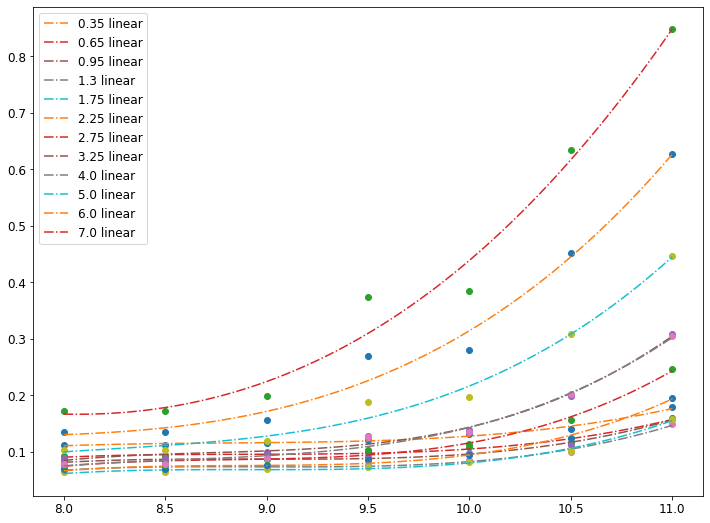

In [56]:
# from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline as spli
res=0.05
m2=np.arange(8,11.5,0.5)
mf=np.linspace(8,11,61)
fig, ax = plt.subplots(figsize=(12,9))
sigm=[]
for z in z_vals[::-1]:
    sig1 = np.array(df.loc[df['z'] == z])[0][5:]
    f = spli(m2, sig1)
#     f2 = interp1d(m2, sig1, kind='cubic')
    ax.plot(m2,sig1, 'o')
    ax.plot(mf,f(mf), '-.', label=str(z)+' linear')
    sigm.append(f(mf))
#should probably try a spline as well    
# ax.set(yscale='log')
ax.legend()

In [57]:
m=pd.DataFrame(sigm[::-1], columns=mf, index=z_vals)
# gamma=gamma.drop(11.25, axis=1)
m.to_csv('conservative_8to11_005_19102021.csv')
m

,8.00,8.05,8.10,8.15,8.20,8.25,8.30,8.35,8.40,8.45,...,10.55,10.60,10.65,10.70,10.75,10.80,10.85,10.90,10.95,11.00
7.00,0.166629,0.166370,0.166413,0.166762,0.167423,0.168399,0.169697,0.171320,0.173273,0.175562,...,0.637695,0.658921,0.680692,0.703015,0.725892,0.749329,0.773331,0.797903,0.823049,0.848774
6.00,0.130248,0.130944,0.131733,0.132623,0.133621,0.134738,0.135981,0.137359,0.138881,0.140554,...,0.460814,0.477076,0.493866,0.511190,0.529058,0.547479,0.566460,0.586010,0.606138,0.626852
5.00,0.099724,0.100903,0.102046,0.103162,0.104262,0.105355,0.106451,0.107561,0.108693,0.109858,...,0.319895,0.331858,0.344291,0.357203,0.370604,0.384504,0.398913,0.413841,0.429297,0.445293
4.00,0.075121,0.076428,0.077635,0.078750,0.079783,0.080745,0.081644,0.082490,0.083293,0.084062,...,0.212308,0.220658,0.229393,0.238525,0.248062,0.258014,0.268391,0.279202,0.290456,0.302164
3.25,0.084567,0.086266,0.087805,0.089196,0.090449,0.091578,0.092594,0.093507,0.094331,0.095077,...,0.211550,0.220055,0.229000,0.238395,0.248252,0.258584,0.269402,0.280717,0.292542,0.304888
2.75,0.074221,0.075774,0.077168,0.078415,0.079523,0.080504,0.081369,0.082127,0.082789,0.083365,...,0.168265,0.175016,0.182140,0.189647,0.197547,0.205852,0.214571,0.223715,0.233294,0.243319
2.25,0.066257,0.067612,0.068822,0.069894,0.070838,0.071664,0.072378,0.072992,0.073512,0.073950,...,0.134404,0.139647,0.145197,0.151063,0.157254,0.163779,0.170647,0.177866,0.185446,0.193395
1.75,0.061367,0.062484,0.063478,0.064354,0.065120,0.065783,0.066351,0.066830,0.067228,0.067552,...,0.109983,0.113955,0.118171,0.122637,0.127362,0.132351,0.137614,0.143156,0.148984,0.155107
1.30,0.067381,0.068389,0.069284,0.070071,0.070758,0.071350,0.071854,0.072276,0.072624,0.072903,...,0.107799,0.111211,0.114837,0.118683,0.122757,0.127065,0.131613,0.136408,0.141455,0.146762
0.95,0.081152,0.082099,0.082941,0.083683,0.084331,0.084892,0.085371,0.085775,0.086109,0.086380,...,0.119827,0.123041,0.126455,0.130076,0.133910,0.137962,0.142238,0.146745,0.151488,0.156474


In [9]:
def ms_plot(sur, k, mean, sig, newmass, ax=None, legend=True, c='r',start=1, norm=150, save=False, i=0, scale='log', top=None, bottom=1e-7):
    mass=newmass[start:]
    h=cosmo.H0.value/100
    dz=[z_vals[k+1]-z_vals[k],z_vals[k]-z_vals[k-1]]
    norm=(cosmo.comoving_volume(z_vals[k]+dz[0]/2)-cosmo.comoving_volume(z_vals[k]-dz[1]/2))*area_dict[sur]
    norm=norm*h**3
    norm=abs(norm)
    errcv=sig*mean
    errtot=np.sqrt(mean+(errcv)**2)
    poiserr=np.sqrt(mean)
    errcv, errtot, poiserr, mean=errcv/norm, errtot/norm, poiserr/norm, mean/norm
    if ax==None:
        fig, ax=plt.subplots(figsize=(12,9))
        

        ax.plot(mass, mean[k][start:], c, label=f'Mass function for {sur}')
        ax.fill_between(mass, mean[k][start:]+poiserr[k][start:],mean[k][start:]-poiserr[k][start:], color = c, alpha=0.4,
                    label='Poisson uncertainty')
        ax.fill_between(mass, mean[k][start:]+errcv[k][start:],mean[k][start:]-errcv[k][start:], color = c, alpha=0.2,
                    label='Cosmic Variance')
        ax.fill_between(mass, mean[k][start:]+ errtot[k][start:], mean[k][start:]- errtot[k][start:], color =c, alpha=0.1,
                    label='Total statistical uncertainty')
    else:
        ax.plot(mass, mean[k][start:], c, label=f'Mass function for {sur}')
        ax.fill_between(mass, mean[k][start:]+poiserr[k][start:],mean[k][start:]-poiserr[k][start:], color = c, alpha=0.4)
        ax.fill_between(mass, mean[k][start:]+errcv[k][start:],mean[k][start:]-errcv[k][start:], color = c, alpha=0.2)
        ax.fill_between(mass, mean[k][start:]+ errtot[k][start:], mean[k][start:]- errtot[k][start:], color =c, alpha=0.1)
    if legend:
        ax.yaxis.grid(color='gray', linestyle='dashed')
        # ax.hlines(1,8,11, 'k', linestyle='dashed')
        ax.set(xlabel=r'Mass [$log(\frac{M_*}{M_\odot})$]', ylabel=r'n [$\frac{h^3}{Mpc^3}}$]',\
               title=f'Mass function at z={np.round(z_vals[k],1)} for COSMOS', yscale=scale)
        ax.set_ylim(bottom, top)
        ax.legend(fontsize=10, loc='upper left')
    if save:
        plt.savefig(f'figs/masslumfunc/z_{np.round(z_vals[k],1)}_total.png')

100%|██████████| 12/12 [00:51<00:00,  4.29s/it]
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


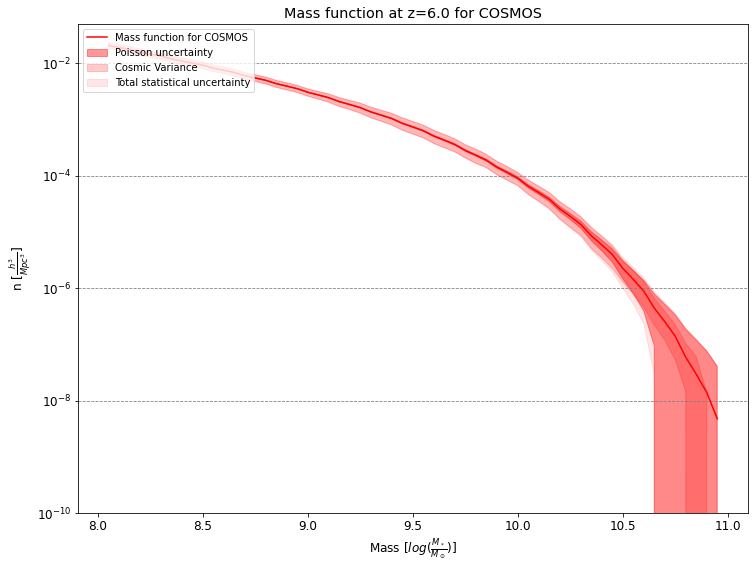

In [10]:
masssurveys={}
if filesave:
    deep = survey(33, 1.27, "cv_john.csv", nearest_wavelength(x,14873.4))  ##higher resolution
    meansdeep, sigdeep, massdeep = mass_john(deep, masses=np.arange(8,11.5,0.5), steps=10, Nsim=5e5) ### increase number of simulations
    masssurveys['COSMOS']=meansdeep, sigdeep, massdeep

    output = open('data/'+file+'mass_means.pkl', 'wb')
    pickle.dump(masssurveys, output)
    output.close()
if not filesave:
    # read dict back from the file
    pkl_file = open('data/'+file+'mass_means.pkl', 'rb')
    masssurveys = pickle.load(pkl_file)
    pkl_file.close()

import matplotlib
font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
ms_plot('COSMOS',1,meansdeep, sigdeep, massdeep, top=None, bottom=1e-10)

In [11]:
import pandas as pd
gamma=pd.DataFrame(sigdeep, columns=massdeep, index=z_vals)
# gamma=gamma.drop(11.25, axis=1)
gamma

,8.00,8.05,8.10,8.15,8.20,8.25,8.30,8.35,8.40,8.45,...,10.50,10.55,10.60,10.65,10.70,10.75,10.80,10.85,10.90,10.95
7.00,0.165571,0.164906,0.162088,0.163352,0.161877,0.165090,0.162748,0.162257,0.162181,0.159995,...,0.641401,0.709338,0.727049,0.905072,0.860639,1.154180,0.000000,0.000000,0.000000,0.000000
6.00,0.127612,0.125924,0.127443,0.126663,0.128195,0.130942,0.126045,0.126521,0.128516,0.126176,...,0.429450,0.456616,0.478320,0.501604,0.528093,0.618957,0.756082,1.062816,0.000000,0.000000
5.00,0.097760,0.098102,0.095658,0.099366,0.096001,0.099018,0.098543,0.096979,0.099343,0.098658,...,0.297316,0.313796,0.323911,0.327838,0.345094,0.339738,0.435060,0.482605,0.548111,0.000000
4.00,0.075100,0.074372,0.074245,0.073370,0.075472,0.074448,0.073510,0.074625,0.074381,0.073633,...,0.191466,0.200921,0.214103,0.226054,0.232791,0.242650,0.258401,0.258054,0.287558,0.396140
3.25,0.081741,0.085470,0.083239,0.082876,0.084654,0.082355,0.087211,0.084579,0.083038,0.081300,...,0.192158,0.199077,0.208501,0.222771,0.228315,0.239631,0.248296,0.263229,0.272235,0.272368
2.75,0.075335,0.075036,0.073641,0.072854,0.073798,0.073193,0.073146,0.073498,0.072292,0.073323,...,0.148459,0.155273,0.162367,0.173737,0.179069,0.188840,0.196111,0.212986,0.213583,0.211572
2.25,0.065661,0.064964,0.066366,0.064557,0.065579,0.064612,0.064857,0.066031,0.065457,0.065962,...,0.118011,0.125680,0.130036,0.137140,0.145532,0.156364,0.162373,0.167438,0.173272,0.178013
1.75,0.059533,0.060321,0.059567,0.059939,0.058769,0.059672,0.060019,0.059037,0.060023,0.059919,...,0.094632,0.101886,0.107046,0.112624,0.116802,0.123621,0.128442,0.134049,0.140761,0.140272
1.30,0.065019,0.064878,0.065343,0.064404,0.064308,0.065534,0.065822,0.065819,0.064672,0.066137,...,0.094719,0.101283,0.102996,0.107085,0.114135,0.118475,0.120038,0.127701,0.132446,0.140066
0.95,0.078841,0.078799,0.078132,0.079538,0.080879,0.078095,0.078862,0.078696,0.080531,0.079179,...,0.105091,0.110875,0.115159,0.123569,0.124106,0.129459,0.132620,0.138479,0.138817,0.146689


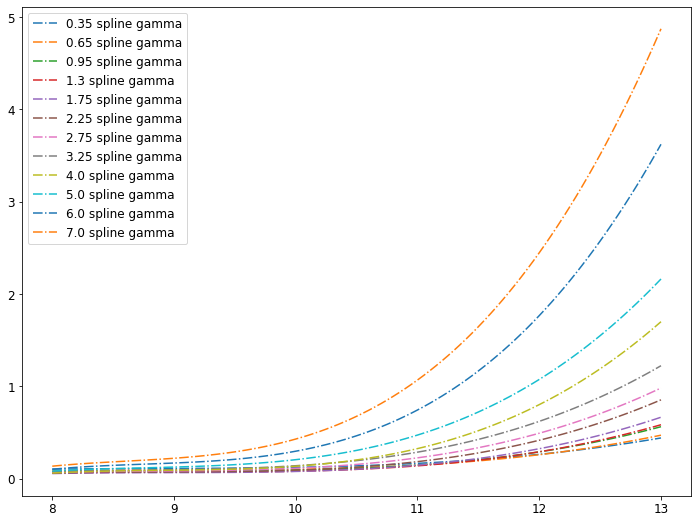

In [58]:
res=0.05
m2=massdeep
mf=np.linspace(8,13,101)
fig, ax = plt.subplots(figsize=(12,9))
sigmg=[]
for z in z_vals[::-1]:
    sig1 = np.array(gamma.loc[z])
    mask=sig1!=0
#     print(mask)
    for i in range(len(mask[:-1])): 
        if mask[i+1]==0: ##last one before 0's start is unstable
            mask[i]=0
#     print(mask)
    spline_g = spli(m2, sig1, w=mask)
    ax.plot(mf,spline_g(mf), '-.', label=str(z)+' spline gamma')
    sigmg.append(spline_g(mf))
# ax.set(yscale='log')
    
ax.legend()

In [59]:
mg=pd.DataFrame(sigmg[::-1], columns=mf, index=z_vals)
# gamma=gamma.drop(11.25, axis=1)
mg.to_csv('nonlinear_8to13_005_19102021.csv')

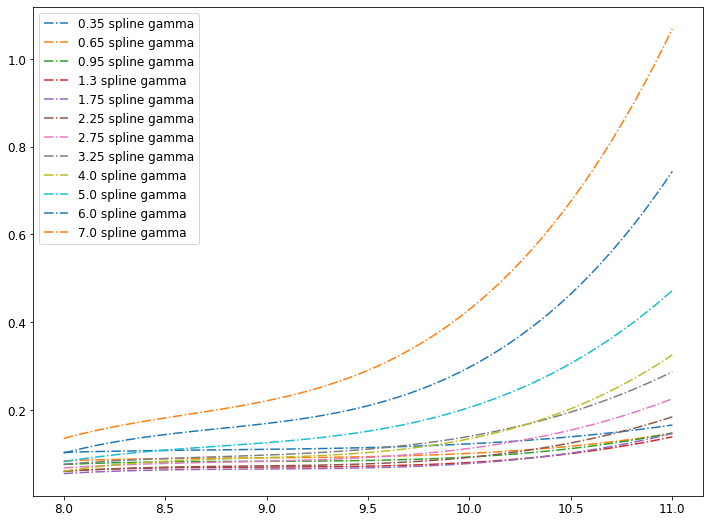

In [60]:
res=0.05
m2=massdeep
mf=np.linspace(8,11,61)
fig, ax = plt.subplots(figsize=(12,9))
sigmg=[]
for z in z_vals[::-1]:
    sig1 = np.array(gamma.loc[z])
    mask=sig1!=0
#     print(mask)
    for i in range(len(mask[:-1])): 
        if mask[i+1]==0: ##last one before 0's start is unstable
            mask[i]=0
#     print(mask)
    spline_g = spli(m2, sig1, w=mask)
    ax.plot(mf,spline_g(mf), '-.', label=str(z)+' spline gamma')
    sigmg.append(spline_g(mf))
# ax.set(yscale='log')
    
ax.legend()

In [61]:
mg=pd.DataFrame(sigmg[::-1], columns=mf, index=z_vals)
# gamma=gamma.drop(11.25, axis=1)
mg.to_csv('nonlinear_8to11_005_19102021.csv')

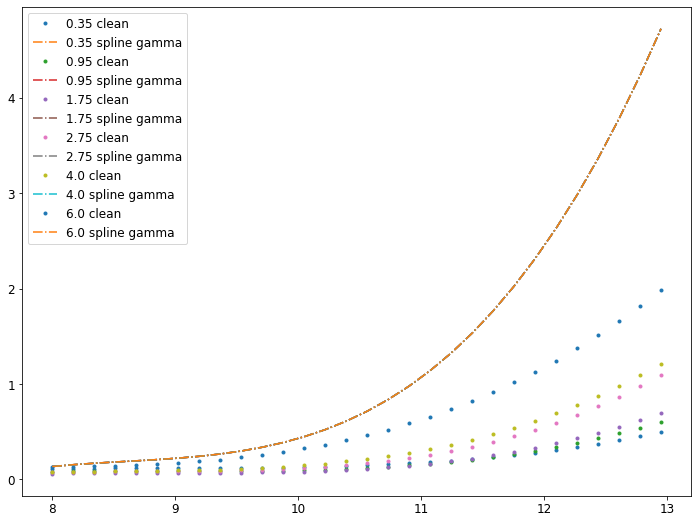

In [29]:
res=0.05
m2=np.arange(8,11.5,0.5)
md=massdeep
mf=np.linspace(8,max(massdeep)+2,30)
fig, ax = plt.subplots(figsize=(12,9))
for z in z_vals[::-2]:
    sig1 = np.array(df.loc[df['z'] == z])[0][5:]
    f = interp1d(m2, sig1)
#     spline = spli(massdeep, sig,w=(sig1!=0))
# #     ax.plot(m2,sig1, '-', label=str(z))
    mask=sig1!=0
    spline2 = spli(m2, sig1, w=(sig1!=0))
    ax.plot(mf,spline2(mf), '.', label=str(z)+' clean')
    ax.plot(mf,spline_g(mf), '-.', label=str(z)+' spline gamma')

    
ax.legend()

In [11]:
gamma.to_csv('gamma_CV.csv')

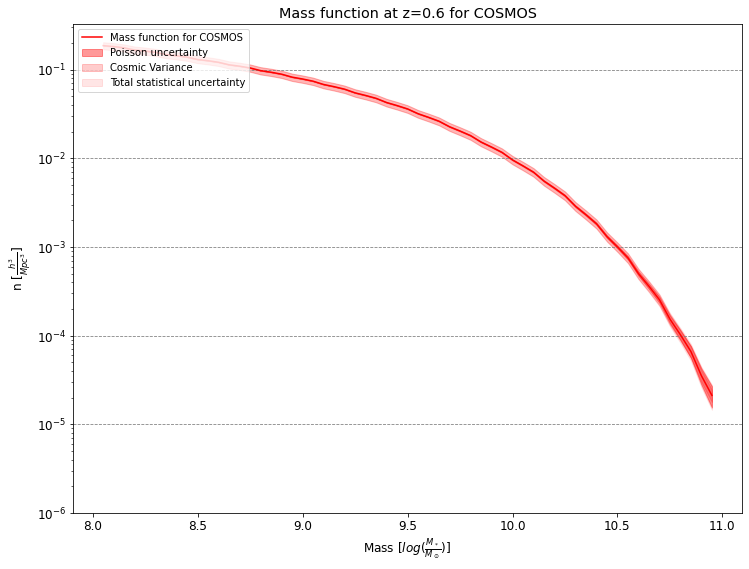

In [23]:
masssurveys={}
deep = survey(33, 1.27, "cv_john.csv", nearest_wavelength(x,14873.4)) ##higher resolution
meansdeep, sigdeep, massdeep = mass_jv(deep, masses=np.arange(8,11.5,0.5), steps=10)### increase number of simulations
masssurveys['COSMOS']=meansdeep, sigdeep, massdeep

font = {'family' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)
ms_plot('COSMOS',10,meansdeep, sigdeep, massdeep, top=None, bottom=1e-6)

In [24]:
import pandas as pd
moster=pd.DataFrame(sigdeep, columns=massdeep, index=z_vals)
# moster=moster.drop(11.25, axis=1)
moster.to_csv('vanilla_moster_CV.csv')

In [25]:
moster

,8.00,8.05,8.10,8.15,8.20,8.25,8.30,8.35,8.40,8.45,...,10.50,10.55,10.60,10.65,10.70,10.75,10.80,10.85,10.90,10.95
7.00,0.1717,0.1717,0.1717,0.1717,0.1717,0.1717,0.1717,0.1717,0.1717,0.1717,...,0.6335,0.65496,0.67642,0.69788,0.71934,0.74080,0.76226,0.78372,0.80518,0.82664
6.00,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,0.1349,...,0.4520,0.46959,0.48718,0.50477,0.52236,0.53995,0.55754,0.57513,0.59272,0.61031
5.00,0.1037,0.1037,0.1037,0.1037,0.1037,0.1037,0.1037,0.1037,0.1037,0.1037,...,0.3093,0.32309,0.33688,0.35067,0.36446,0.37825,0.39204,0.40583,0.41962,0.43341
4.00,0.0783,0.0783,0.0783,0.0783,0.0783,0.0783,0.0783,0.0783,0.0783,0.0783,...,0.2020,0.21223,0.22246,0.23269,0.24292,0.25315,0.26338,0.27361,0.28384,0.29407
3.25,0.0881,0.0881,0.0881,0.0881,0.0881,0.0881,0.0881,0.0881,0.0881,0.0881,...,0.1987,0.20960,0.22050,0.23140,0.24230,0.25320,0.26410,0.27500,0.28590,0.29680
2.75,0.0772,0.0772,0.0772,0.0772,0.0772,0.0772,0.0772,0.0772,0.0772,0.0772,...,0.1568,0.16571,0.17462,0.18353,0.19244,0.20135,0.21026,0.21917,0.22808,0.23699
2.25,0.0687,0.0687,0.0687,0.0687,0.0687,0.0687,0.0687,0.0687,0.0687,0.0687,...,0.1244,0.13153,0.13866,0.14579,0.15292,0.16005,0.16718,0.17431,0.18144,0.18857
1.75,0.0633,0.0633,0.0633,0.0633,0.0633,0.0633,0.0633,0.0633,0.0633,0.0633,...,0.1015,0.10706,0.11262,0.11818,0.12374,0.12930,0.13486,0.14042,0.14598,0.15154
1.30,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,0.0691,...,0.0997,0.10460,0.10950,0.11440,0.11930,0.12420,0.12910,0.13400,0.13890,0.14380
0.95,0.0828,0.0828,0.0828,0.0828,0.0828,0.0828,0.0828,0.0828,0.0828,0.0828,...,0.1115,0.11620,0.12090,0.12560,0.13030,0.13500,0.13970,0.14440,0.14910,0.15380


In [28]:
gamma

,8.00,8.05,8.10,8.15,8.20,8.25,8.30,8.35,8.40,8.45,...,10.50,10.55,10.60,10.65,10.70,10.75,10.80,10.85,10.90,10.95
7.00,0.165571,0.164906,0.162088,0.163352,0.161877,0.165090,0.162748,0.162257,0.162181,0.159995,...,0.641401,0.709338,0.727049,0.905072,0.860639,1.154180,0.000000,0.000000,0.000000,0.000000
6.00,0.127612,0.125924,0.127443,0.126663,0.128195,0.130942,0.126045,0.126521,0.128516,0.126176,...,0.429450,0.456616,0.478320,0.501604,0.528093,0.618957,0.756082,1.062816,0.000000,0.000000
5.00,0.097760,0.098102,0.095658,0.099366,0.096001,0.099018,0.098543,0.096979,0.099343,0.098658,...,0.297316,0.313796,0.323911,0.327838,0.345094,0.339738,0.435060,0.482605,0.548111,0.000000
4.00,0.075100,0.074372,0.074245,0.073370,0.075472,0.074448,0.073510,0.074625,0.074381,0.073633,...,0.191466,0.200921,0.214103,0.226054,0.232791,0.242650,0.258401,0.258054,0.287558,0.396140
3.25,0.081741,0.085470,0.083239,0.082876,0.084654,0.082355,0.087211,0.084579,0.083038,0.081300,...,0.192158,0.199077,0.208501,0.222771,0.228315,0.239631,0.248296,0.263229,0.272235,0.272368
2.75,0.075335,0.075036,0.073641,0.072854,0.073798,0.073193,0.073146,0.073498,0.072292,0.073323,...,0.148459,0.155273,0.162367,0.173737,0.179069,0.188840,0.196111,0.212986,0.213583,0.211572
2.25,0.065661,0.064964,0.066366,0.064557,0.065579,0.064612,0.064857,0.066031,0.065457,0.065962,...,0.118011,0.125680,0.130036,0.137140,0.145532,0.156364,0.162373,0.167438,0.173272,0.178013
1.75,0.059533,0.060321,0.059567,0.059939,0.058769,0.059672,0.060019,0.059037,0.060023,0.059919,...,0.094632,0.101886,0.107046,0.112624,0.116802,0.123621,0.128442,0.134049,0.140761,0.140272
1.30,0.065019,0.064878,0.065343,0.064404,0.064308,0.065534,0.065822,0.065819,0.064672,0.066137,...,0.094719,0.101283,0.102996,0.107085,0.114135,0.118475,0.120038,0.127701,0.132446,0.140066
0.95,0.078841,0.078799,0.078132,0.079538,0.080879,0.078095,0.078862,0.078696,0.080531,0.079179,...,0.105091,0.110875,0.115159,0.123569,0.124106,0.129459,0.132620,0.138479,0.138817,0.146689


In [49]:
diff=(m-mg)/m

In [50]:
diff.describe()

,8.00,8.05,8.10,8.15,8.20,8.25,8.30,8.35,8.40,8.45,...,12.55,12.60,12.65,12.70,12.75,12.80,12.85,12.90,12.95,13.00
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,0.122465,0.109636,0.098109,0.087809,0.078665,0.070607,0.063568,0.057482,0.052282,0.047904,...,-0.108011,-0.111179,-0.114332,-0.117471,-0.120595,-0.123703,-0.126796,-0.129872,-0.132932,-0.135975
std,0.056502,0.040868,0.027505,0.016975,0.011412,0.013177,0.018225,0.023240,0.027382,0.030478,...,0.340974,0.347761,0.354500,0.361189,0.367830,0.374423,0.380967,0.387463,0.393910,0.400311
min,0.065277,0.065124,0.064877,0.064543,0.061608,0.039366,0.020838,0.005847,-0.005817,-0.014392,...,-0.853706,-0.872902,-0.892045,-0.911133,-0.930162,-0.949132,-0.968040,-0.986883,-1.005660,-1.024371
25%,0.082738,0.081624,0.080391,0.079046,0.066444,0.063330,0.060965,0.048547,0.038110,0.029682,...,-0.280515,-0.286177,-0.291751,-0.297240,-0.302644,-0.307963,-0.313200,-0.318355,-0.323430,-0.328425
50%,0.098533,0.094830,0.091311,0.087337,0.082522,0.075385,0.064358,0.063595,0.062769,0.061885,...,0.084985,0.085424,0.085842,0.086242,0.086622,0.086986,0.087332,0.087662,0.087977,0.088277
75%,0.180657,0.151535,0.120369,0.094583,0.086324,0.080234,0.077760,0.075413,0.072639,0.069773,...,0.102424,0.103232,0.103946,0.104637,0.105305,0.105952,0.106578,0.107185,0.107772,0.108341
max,0.219552,0.178551,0.142083,0.115605,0.095011,0.083425,0.080523,0.077643,0.074781,0.071935,...,0.129411,0.130770,0.132090,0.133372,0.134617,0.135825,0.136999,0.138138,0.139243,0.140317
